In [9]:

import os
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph import StateGraph,START, END , add_messages
from langchain_groq import ChatGroq
from IPython.display import Image, display
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [5]:
llm =  ChatGroq(temperature=0, model="openai/gpt-oss-20b")
answer=llm.invoke("Hello how are you?")
print(answer.content)

Hello! I’m doing great—thanks for asking. How can I help you today?


In [6]:
class State(TypedDict):
    messages: Annotated[list[str], add_messages]

In [11]:
graph_builder=StateGraph(State)
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

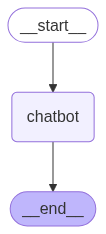

In [12]:

# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph=graph_builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))
config={"configurable": {"thread_id": "1"}}


In [ ]:
import json
def run_graph(user_input):
    event = graph.invoke({"messages": [user_input]}, config=config)  # type: ignore
    print(json.dumps(event, indent=2, default=str))






In [ ]:

run_graph("Hello how are you?")

{
  "messages": [
    "content='Hi there! My name is Will.' additional_kwargs={} response_metadata={} id='12933cb4-c95e-442e-801c-faa3e47b94e1'",
    "content='Hello Will! \ud83d\udc4b How can I help you today?' additional_kwargs={'reasoning_content': 'We need to respond. The user says \"Hi there! My name is Will.\" We should greet them. The user hasn\\'t asked a question. We can respond with a friendly greeting.'} response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 79, 'total_tokens': 138, 'completion_time': 0.054075362, 'prompt_time': 0.005082182, 'queue_time': 0.045322158, 'total_time': 0.059157544}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_af4b447bfc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None} id='run--ece03e04-f643-437b-8033-5733cabacba8-0' usage_metadata={'input_tokens': 79, 'output_tokens': 59, 'total_tokens': 138}",
    "content='what is todays date' additional_kwargs={} response_metadata={} id='5a0eeca

In [ ]:
# %pip install beautifulsoup4

urls=[
    "https://lilianweng.github.io/posts/2023-06-23-agent/"
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/"
]



from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

docs=[WebBaseLoader(url).load() for url in urls]
docs_list=[item for sublist in docs for item in sublist]

text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder()

In [2]:
# !pip install sentence_transformers
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings()



/Users/muhammadzohaib/Desktop/ds_projects/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Developer/CommandLineTools/Libr

In [6]:
from langchain.vectorstores.cassandra import Cassandra

vector_store = Cassandra(embedding=embeddings, table_name="documents",session=None,keyspace=None)
vector_store.add_documents(text_splitter.split_documents(docs_list))
print("inserted %i documents" % len(docs_list))

RuntimeError: Numpy is not available